# Análise de investimentos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance 
yfinance.pdr_override()
procter_and_gamble = pdr.get_data_yahoo('PG', start='1995-01-01', end='2017-03-23')

# opção do csv baixado do site a yahoo
# procter_and_gamble = pd.read_csv('../data/PG.csv')

[*********************100%%**********************]  1 of 1 completed


In [2]:
procter_and_gamble.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.626417,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.565284,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.458298,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.473583,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.443020,1795200


In [3]:
procter_and_gamble.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-16,91.440002,91.720001,91.099998,91.440002,76.063652,6601200
2017-03-17,91.449997,92.000000,90.919998,91.000000,75.697639,37010100
2017-03-20,90.959999,91.410004,90.940002,91.220001,75.880630,7772900
2017-03-21,91.300003,91.750000,91.029999,91.190002,75.855698,8211000
2017-03-22,91.309998,91.800003,90.750000,90.989998,75.689316,7798000


In [4]:
pg = procter_and_gamble[["Adj Close"]].copy().reset_index()
pg['Date'] = pd.to_datetime(pg['Date'])
pg['ano'] = pg.Date.dt.year
pg['mes'] = pg.Date.dt.month
pg = pg[['Date', 'ano', 'mes', 'Adj Close']]

pg

,Date,ano,mes,Adj Close
0,1995-01-03,1995,1,7.626417
1,1995-01-04,1995,1,7.565284
2,1995-01-05,1995,1,7.458298
3,1995-01-06,1995,1,7.473583
4,1995-01-09,1995,1,7.443020
...,...,...,...,...
5590,2017-03-16,2017,3,76.063652
5591,2017-03-17,2017,3,75.697639
5592,2017-03-20,2017,3,75.880630
5593,2017-03-21,2017,3,75.855698


## Retorno simples 
Calculado sobre o preço de fechamento

$$\text{retorno simples} = \frac{P_1-P_0}{P_0} = \frac{P_1}{P_0}-1$$ 

In [5]:
pg

,Date,ano,mes,Adj Close
0,1995-01-03,1995,1,7.626417
1,1995-01-04,1995,1,7.565284
2,1995-01-05,1995,1,7.458298
3,1995-01-06,1995,1,7.473583
4,1995-01-09,1995,1,7.443020
...,...,...,...,...
5590,2017-03-16,2017,3,76.063652
5591,2017-03-17,2017,3,75.697639
5592,2017-03-20,2017,3,75.880630
5593,2017-03-21,2017,3,75.855698


In [6]:
pg['retorno_simples'] = (pg['Adj Close']/pg['Adj Close'].shift(1)) - 1

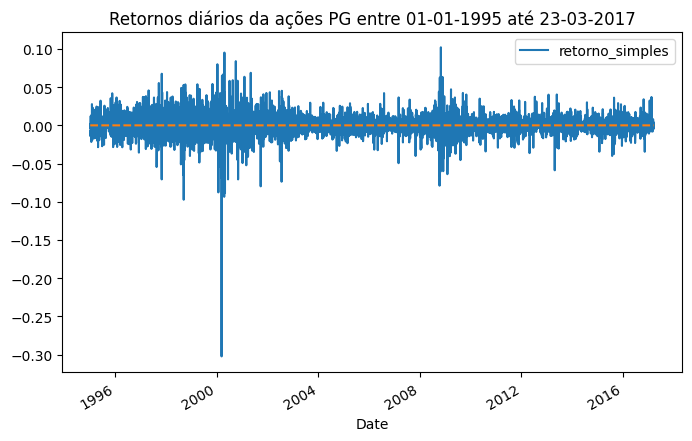

In [7]:
pg[['Date', 'retorno_simples']].plot(x='Date', y='retorno_simples',figsize=(8, 5))
plt.title("Retornos diários da ações PG entre 01-01-1995 até 23-03-2017")
plt.plot(pg.Date, len(pg.Date)*[0], '--')
plt.show()

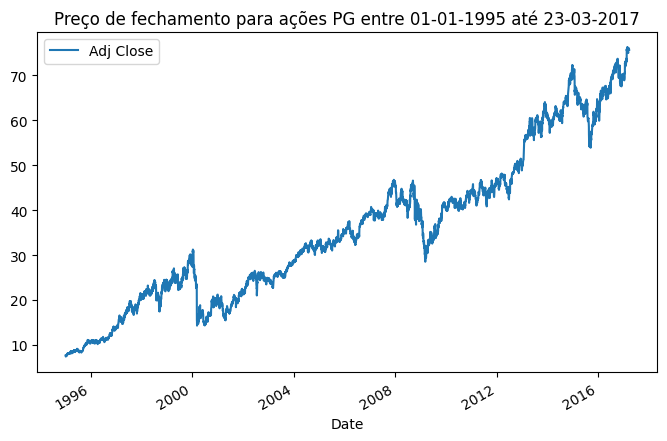

In [8]:
pg[['Date', 'Adj Close']].plot(x='Date', y='Adj Close',figsize=(8, 5))
plt.title("Preço de fechamento para ações PG entre 01-01-1995 até 23-03-2017")
plt.show()

In [9]:
avg_returns = pg['retorno_simples'].mean()
avg_returns

0.0005143589669626453

In [10]:
avg_returns_year = pg['retorno_simples'].mean() * 250
print(f'retorno anual médio {round(avg_returns_year*100, 3)} %')

retorno anual médio 12.859 %


## Retorno logarítmo

Lembrando que estamos fazendo a análise de um único ativo. Nesse caso é mais interessante analisar o retorno logarítmo.

$$\text{retorno log} = \ln\left(\frac{P_{t}}{P_{t-1}}\right)$$

In [11]:
pg['retorno_log'] = np.log(pg['Adj Close']/pg['Adj Close'].shift(1))

In [12]:
pg

,Date,ano,mes,Adj Close,retorno_simples,retorno_log
0,1995-01-03,1995,1,7.626417,NaN,NaN
1,1995-01-04,1995,1,7.565284,-0.008016,-0.008048
2,1995-01-05,1995,1,7.458298,-0.014142,-0.014243
3,1995-01-06,1995,1,7.473583,0.002049,0.002047
4,1995-01-09,1995,1,7.443020,-0.004090,-0.004098
...,...,...,...,...,...,...
5590,2017-03-16,2017,3,76.063652,0.000438,0.000438
5591,2017-03-17,2017,3,75.697639,-0.004812,-0.004824
5592,2017-03-20,2017,3,75.880630,0.002417,0.002414
5593,2017-03-21,2017,3,75.855698,-0.000329,-0.000329


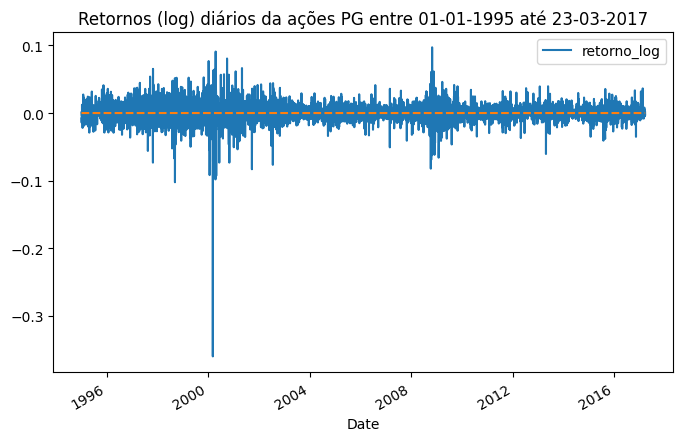

In [13]:
pg[['Date', 'retorno_log']].plot(x='Date', y='retorno_log',figsize=(8, 5))
plt.title("Retornos (log) diários da ações PG entre 01-01-1995 até 23-03-2017")
plt.plot(pg.Date, len(pg.Date)*[0], '--')
plt.show()

## Retorno de multiplos investimentos

Vamos considerar um portifólio simples, onde os quatro ativos tem pesos iguais, e calcular as suas respectivas taxas de retorno histórico.

\begin{array}{|c|c|c|}
\hline
\text{Ativo} & \text{Taxa média anula de retorno(\%)} & Peso \\
\hline
\text{P\&G} &   0.318524 & 0.25 \\
\text{MSFT} &  0.153581 & 0.25\\
\text{GB} &  0.116717 & 0.25\\
\text{F} & 0.126224 & 0.25\\
\hline
\end{array}

In [14]:
# portifólio com ações da P&G,Microsoft, Ford, General Electrics
tickers = ["PG", 'MSFT', 'F', 'GE'] 
preco_fechamento = pdr.get_data_yahoo(tickers, start='1995-01-01', end='2017-03-23')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [15]:
acoes = preco_fechamento.copy()
acoes = acoes.rename(
    columns={'F': 'ford', 
             'GE': 'ge',
             'MSFT': 'microsoft', 
             'PG': 'pg'}
)

acoes.head()

,ford,ge,microsoft,pg
Date,,,,
1995-01-03,3.819576,25.494411,2.332130,7.626417
1995-01-04,3.922348,25.494411,2.349082,7.565284
1995-01-05,3.888091,25.556908,2.310335,7.458298
1995-01-06,3.888091,25.431940,2.349082,7.473583
1995-01-09,3.956604,25.182007,2.334551,7.443020


### Retornos simples - indicados para avaliar uma carteira de investimentos diversificados
 - Normalizando os valores - comparar do mesmo ponto inicial
$$\frac{P_{t}}{P_{0}}*100$$


In [16]:
acoes.iloc[0]

ford          3.819576
ge           25.494411
microsoft     2.332130
pg            7.626417
Name: 1995-01-03 00:00:00, dtype: float64

In [17]:
acoes = (acoes/acoes.iloc[0])*100

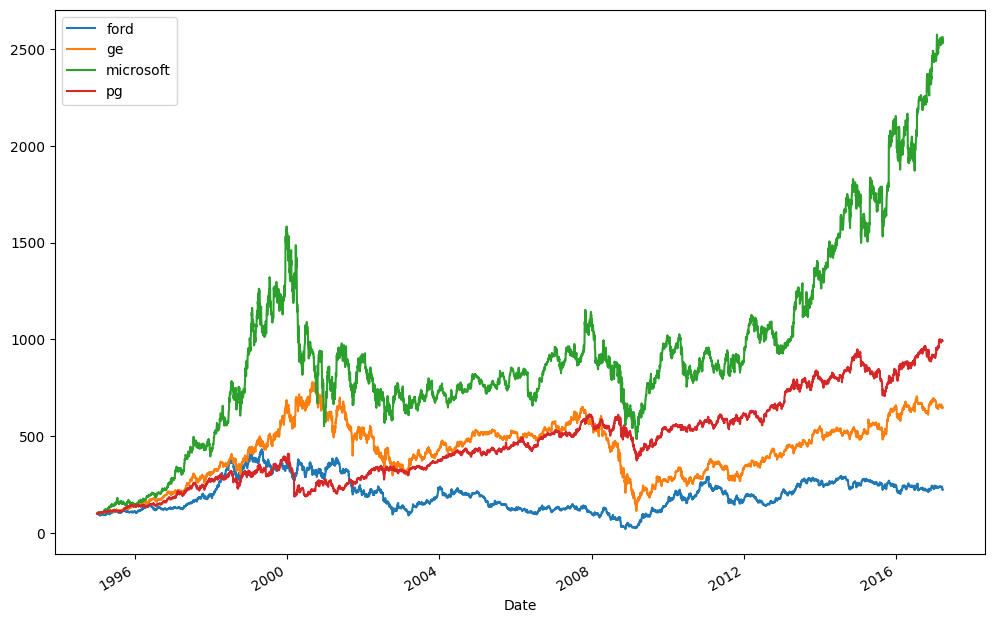

In [18]:
acoes.plot(figsize=(12, 8))
plt.show()

In [19]:
retornos = (acoes/acoes.shift(1))-1

In [20]:
retornos.head()

,ford,ge,microsoft,pg
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,0.026907,0.000000,0.007269,-0.008016
1995-01-05,-0.008734,0.002451,-0.016495,-0.014142
1995-01-06,0.000000,-0.004890,0.016771,0.002049
1995-01-09,0.017621,-0.009828,-0.006186,-0.004090


In [21]:
pesos = np.array(4*[0.25])
pesos

array([0.25, 0.25, 0.25, 0.25])

In [22]:
# estimando o retorno anual médio
retorno_anual = retornos.mean() *250
retorno_anual

ford         0.117966
ge           0.126426
microsoft    0.196030
pg           0.128590
dtype: float64

In [23]:
print(f"""Retorno anual da carteira de investimentos com pesos iguais
{round(np.dot(retorno_anual, pesos) * 100, 3)} %""")

Retorno anual da carteira de investimentos com pesos iguais
14.225 %


In [24]:
pesos_2 = np.array([0.4,0.4, 0.15, 0.05])
print(f"""Retorno anual da carteira de investimentos com pesos diferentes
{round(np.dot(retorno_anual, pesos_2) * 100, 3)} %""")

Retorno anual da carteira de investimentos com pesos diferentes
13.359 %
